<a href="https://colab.research.google.com/github/ProtossDragoon/Deep-Learning-with-Python/blob/main/chapter3_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98%EA%B5%AC%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작성 : 2020/10/23

- 이 notebook 은 SAI I Team 의 '케라스 창시자에게 배우는 딥러닝' 스터디 참고/멘토링 자료 목적으로 제작되었습니다.
- 이 notebook 을 학습하고자 할 때, 해당 주차의 책을 모두 공부한 후 따라가는 것을 매우 추천합니다.
- 이 코드와 주석에 설명되어있지 않다고 중요하지 않은 내용인 것은 아닙니다. 반드시 책을 선행해 주세요.
- 제작자 github : https://github.com/ProtossDragoon
- 질문 올리는 곳 : 
- 2020년 SAI 동아리원분들께서는, https://github.com/sju-coml/SAI-2020-Team-I/issues 에 질문을 올려주세요.
- contact : dlwkdgn1@naver.com / dlwkdgn3@gmail.com

 # 신경망의 구조

## 목적 함수에 대한 비유

- "전지전능한 AI" 에 대한 비유를 들었는데, 나쁘지 않은 비유입니다. 하지만, 조금 더 구체적인 비유를 들어 보고자 합니다. 이 책이 아쉬운 점은 일부 주제에 대해서 '너무 추상적으로' 알려준다는 것입니다.
- 상상해 봅시다. 예를 들어, 내가 100장의 이미지를 준비했습니다. 100장의 이미지를 바탕으로, 두 class 를 구분해내는 동시에, 이미지상에 어떤 사물의 위치가 어디 있는지 예측하도록 손실 함수값을 최소화시키도록 훈련시킬 것입니다.
- 100장의 이미지 중 50장은 강아지, 50장은 고양이 사진입니다.
- 목적 함수 (손실 함수, loss function) 를, 다음과 같이 설계했다고 생각해 봅시다.

<br>

목적 함수 f = (강아지나 고양이나 위치를 잘못 맞춘 정도) + (강아지나 고양이의 클래스를 잘못 맞춘 정도)

<br>

- 그런데 여기서 (강아지나 고양이나 위치를 잘못 맞춘 정도) 는, 이미지의 크기에 따라 달라집니다.
- (강아지나 고양이의 클래스를 잘못 맞춘 정도) 는, 0이냐 1이냐에 따라서 달라집니다.
- 이미지의 크기가 만약 720 x 720 pixel 이라고 하겠습니다.
- 모델에 강아지 사진을 넣었고, 실제로 강아지에 해당하는 구역의 중심값이 (251, 623) 이었습니다.
- 모델은 (255, 620) 을 강아지 위치의 중심이라고 생각했고, 강아지 [0.4 (고양이일 확률), 0.6 (강아지일 확률)] 라고 예측했습니다.
- 위치는 꽤나 잘 예측했습니다. 그런데 문제는 강아지 위치의 중심과 예측값과의 거리는 4밖에 나지 않습니다. 오히려 모델이 잘못한 부분은 분류입니다.
- 그런데, 모델이 혼내는 정도는 "위치" 에 따라서 5만큼 혼내지만, "예측" 에 따라서는 0.4만큼만 혼낸다는 점입니다. (물론, 실제로는 저러한 수치를 내는 방법이 훨씬 정교합니다.) 이는 분명히 잘못됐습니다. 이렇게 혼낸다면, 조금이라도 모델이 위치에만 집착을 하게 될 것입니다. 위치 오차를 줄이는 것이, 클래스 오류를 줄이는 것보다 훨씬 효율적일 테니까요.



# 영화 리뷰 분류 : 이진 분류 예제 (Classification)

In [1]:
from tensorflow import keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words = 10000)
# 책에는 kears.imdb 로 되어있었지만, 패치를 거치며 이렇게 imdb 함수의 위치가 이동되었습니다.

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
!ls

sample_data


In [7]:
print(len(train_data))
print(len(train_data[0]))
print(train_data[0][0 : 10])
print(len(train_labels))
print(train_labels[0])

25000
218
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
25000
1


In [15]:
sentence_max_li = []
for sentence in train_data :
  sentence_max_li.append(max(sentence))
print(max(sentence_max_li))



''' 
# 아래 코드와 동치입니다.
max([ max(i) for i in train_data ])
'''

9999


' \n# 아래 코드와 동치입니다.\nmax([ max(i) for i in train_data ])\n'

In [8]:
word_index = keras.datasets.imdb.get_word_index()
print(type(word_index))

1646592/1641221 [==============================] - 0s 0us/step
<class 'dict'>


In [14]:
reverse_word_index = {}
for (key, value) in list(word_index.items()):
  reverse_word_index[value] = key

decoded_review = ''
temp_li = []
for i in train_data[0]:
  temp_li.append(reverse_word_index.get(i-3, '?'))
  # 딕셔너리 안에 찾으려는 Key 값이 없을 경우 미리 정해 둔 디폴트 값을 대신 가져오게 하고 싶을 때에는 get(x, '디폴트 값')을 사용하면 편리하다.
decoded_review = ' '.join(temp_li)
print(decoded_review)

'''
# 아래 코드와 동치입니다.
reverse_word_index = dict([(value, key) for () in list(word_index.items())])
decoded_review = ' '.join(reverse_word_index.get(i-3, '?') for i in train_data[0])
'''

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

"\n# 아래 코드와 동치입니다.\nreverse_word_index = dict([(value, key) for () in list(word_index.items())])\ndecoded_review = ' '.join(reverse_word_index.get(i-3, '?') for i in train_data[0])\n"

### 데이터 준비

In [32]:
train_data.shape

(25000,)

In [26]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000): # sequence ex. : [13, 25, 100, 999, 5, 2]
  results = np.zeros([len(sequences), dimension])
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # i 행 sequence 열에 추가. 뭐 이런 식.
    # [
    #  [0, 0, 1., 0, 0, ..., 0],
    #  [0, 0, 0, 0, 0, ..., 1.],
    # ...
    #  [0, 1., 0, 0, 0, ... ],
    # ]
    # 생각하는 방법 : "가장 안쪽 차원(axis, dimension) 이 하나의 시퀀스구나."
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [35]:
y_train = np.asarray(train_labels) # 리스트 자료형에서 numpy 자료형으로 바뀐것. *참고 : np.array() 와 np.asarray() 는 복사 / 참조의 차이.
y_test = np.asarray(test_labels)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


### 신경망 모델 만들기

- 자유도 관련 언급이 나옵니다. 자유도라는 용어는 보통 통계에서 정의되는 듯 한데, 여기서는 그냥 '자유로운 정도' 나 '차원의 수' 정도로 이해하면 무리가 없습니다.
- 이 내용에 대해서 잘 이해가 가지 않는다면, https://youtu.be/fNk_zzaMoSs 재생목록 전체와 https://youtu.be/UOvPeC8WOt8 를 참고하세요. 16차원으로 확장된다는 것이 무슨 의미인지 이해할 수 있을 것입니다.
- 활성화 함수에 대한 내용도 마찬가지입니다. 선형 변환을 여러번 암만 해 보아야, 하나의 선형 변환으로 치환할 수 있다는 사실을 https://youtu.be/fNk_zzaMoSs 로부터 알 수 있고, 활성화 함수가 비선형적으로 동작한다는 사실을 https://youtu.be/UOvPeC8WOt8 로부터 알 수 있습니다.



In [37]:
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation = 'relu', input_shape = (10000,))) # 이미 케라스에서 잘 구현되어 있기 때문에, relu 같이 문자열로 사용하는 것.
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop', # keras.optimizers.RMSprop(lr = 0.001)
              loss = 'binary_crossentropy', # keras.losses.binary_crossentropy
              metrics = ['accuracy']) # [keras.metrics.binary_accuracy]

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val),
)

Epoch 1/20
30/30 [==============================] - 2s 72ms/step - loss: 0.5441 - accuracy: 0.7773 - val_loss: 0.4181 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3348 - accuracy: 0.9020 - val_loss: 0.3256 - val_accuracy: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2392 - accuracy: 0.9269 - val_loss: 0.2894 - val_accuracy: 0.8873
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1896 - accuracy: 0.9388 - val_loss: 0.2915 - val_accuracy: 0.8842
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1517 - accuracy: 0.9531 - val_loss: 0.2773 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1296 - accuracy: 0.9587 - val_loss: 0.2994 - val_accuracy: 0.8816
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1066 - accuracy: 0.9701 - val_loss: 0.3263 - val_accuracy: 0.8747
Epoch 8/20
30

In [41]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

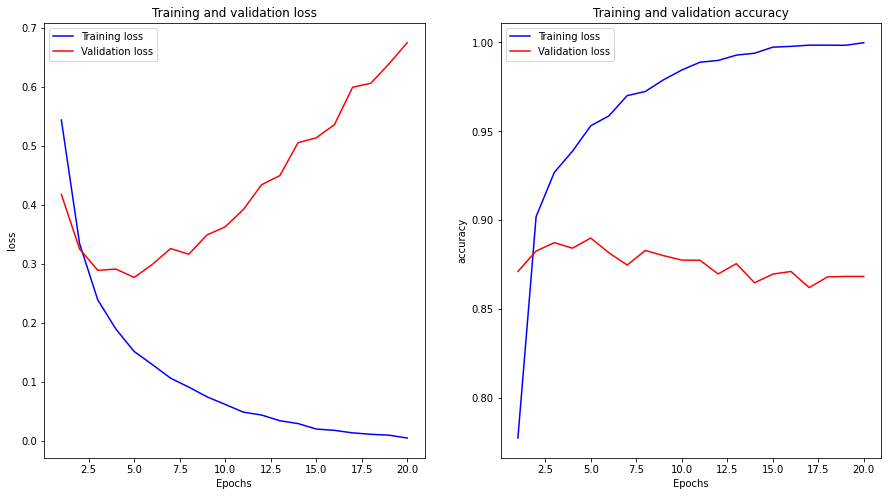

In [53]:
import matplotlib.pyplot as plt
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize = [15, 8])
plt.subplot(1,2,1)
plt.plot(epochs, loss, color = 'blue', label = 'Training loss')
plt.plot(epochs, val_loss, color = 'red', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, acc, color = 'blue', label = 'Training loss')
plt.plot(epochs, val_acc, color = 'red', label = 'Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [54]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7276 - accuracy: 0.8512


## 주택 가격 예측 : 회귀 문제 (Regression Problem)

In [57]:
from tensorflow import keras

(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()
print(train_data.shape, train_targets.shape)
print(test_data.shape, test_targets.shape)

(404, 13) (404,)
(102, 13) (102,)


In [61]:
mean = train_data.mean(axis = 0)
train_data = train_data - mean # 여기서도 사실 브로드캐스팅이 적용되었다고 할 수 있습니다.
std = train_data.std(axis = 0)
train_data = train_data / std

# z = (x - m) / std

In [62]:
def build_model():
  model = keras.model.Sequential()
  model.add(keras.layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[0])))
  model.add(keras.layers.Dense(64, activation = 'relu'))
  model.add(keras.layers.Dense(1))
  model.compile(optimizer = 'rmsprop',  loss = 'mse', metrics = ['mae']) # loss 는 mse 로 주는데, 확인만 mae 로 하겠다는 겁니다.
  return model

### K Fold

In [ ]:
k = 4 # 샘플 개수
num_val_samples = len(train_data) // k # 교차검증 (K-Fold Cross Validation) 샘플 당 들어가는 데이터의 개수
num_epochs = 500
all_scores = []
for i in range(k) :
  print('현재 ',k,'fold 처리중')
  val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[: i * num_val_samples], train_targets[(i + 1) * num_val_samples :]],
      axis = 0
  )

  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epoches = num_epochs, batch_szie = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)
